In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
def calculate_stacking(sequence):
    # Dictionary to map nucleotide pairs to their respective stacking values
    stacking_map = {
        'AA': -17.5,
        'AT': -16.7,
        'TA': -17,
        'AG': -15.8,
        'GA': -14.7,
        'TT': -17.5,
        'AC': -18.1,
        'CA': -19.5,
        'TG': -19.5,
        'GT': -18.1,
        'TC': -14.7,
        'CT': -15.8,
        'CC': -14.9,
        'CG': -19.2,
        'GC': -14.7,
        'GG': -14.9,
    }
    
    size = len(sequence)
    list_stacking = []
    
    for pos in range(size-1):
        nucleotide_pair = sequence.upper()[pos:pos+2]
        stacking = stacking_map.get(nucleotide_pair, None)
        
        if stacking is not None:
            list_stacking.append(stacking)
    
    return list_stacking

def create_dataframe(file_path):
    # Read the contents of the file
    with open(file_path) as f:
        sequence = f.read()

    # Calculate the stacking values for the sequence
    list_stacking = calculate_stacking(sequence)

    # Calculate the number of rows and columns needed
    num_rows = (len(list_stacking) - 1) // 99 + 1
    num_cols = min(len(list_stacking), 99)

    # Create a 2D numpy array with NaN values to represent the DataFrame
    data_array = np.full((num_rows, num_cols), np.nan)

    # Fill the data_array with the stacking values
    for i, val in enumerate(list_stacking):
        row = i // 99
        col = i % 99
        data_array[row, col] = val

    # Create the DataFrame with 99 columns
    df_sequence = pd.DataFrame(data_array, columns=range(1, num_cols + 1))

    return df_sequence


file_path = r"D:\Sequences 80-20\Sequences_80-20_sequences Chlamydia pneumoniae.txt"

# Create the dataframe containing the stacking values for the given sequence
df_stacking = create_dataframe(file_path)

# Generate a list of column names
new_columns = list(range(-80, 19))
df_stacking.columns = new_columns
df_stacking.reset_index(drop=True, inplace=True)

# Display the dataframe
df_stacking


,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
0,-14.7,-19.2,-14.9,-14.9,-14.7,-15.8,-14.7,-16.7,-17.0,-17.5,...,-16.7,-17.5,-17.5,-17.5,-19.5,-14.7,-16.7,-17.5,-17.5,-17.0
1,-14.9,-19.5,-16.7,-17.0,-18.1,-14.9,-15.8,-17.0,-15.8,-14.7,...,-16.7,-19.5,-18.1,-19.5,-18.1,-17.5,-17.5,-19.5,-14.7,-16.7
2,-15.8,-17.0,-16.7,-17.5,-17.5,-17.5,-17.5,-17.5,-17.0,-17.5,...,-17.0,-16.7,-17.5,-14.7,-14.9,-15.8,-14.7,-15.8,-17.5,-17.0
3,-15.8,-18.1,-19.5,-18.1,-17.5,-14.7,-15.8,-17.0,-16.7,-17.5,...,-14.7,-15.8,-14.9,-14.9,-14.7,-17.5,-17.5,-17.5,-17.5,-17.5
4,-17.5,-17.0,-17.5,-15.8,-14.7,-15.8,-14.7,-17.5,-17.5,-15.8,...,-17.5,-17.5,-17.5,-16.7,-14.7,-19.5,-17.5,-17.5,-15.8,-18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-14.9,-15.8,-19.5,-18.1,-17.0,-16.7,-17.5,-19.5,-14.7,-17.5,...,-18.1,-19.5,-18.1,-17.5,-17.5,-19.5,-14.9,-14.9,-14.7,-19.5
400,-16.7,-19.5,-14.7,-17.5,-16.7,-14.7,-14.9,-15.8,-17.0,-15.8,...,-19.5,-18.1,-17.0,-18.1,-19.2,-14.9,-18.1,-14.7,-19.2,-14.9
401,-15.8,-17.5,-17.5,-17.5,-17.5,-17.0,-16.7,-17.5,-17.5,-17.5,...,-19.2,-14.9,-14.9,-14.9,-14.7,-15.8,-14.7,-14.9,-19.5,-17.5
402,-17.5,-18.1,-19.5,-17.5,-15.8,-14.9,-14.7,-17.5,-17.5,-18.1,...,-17.5,-16.7,-14.7,-15.8,-14.7,-19.2,-14.7,-18.1,-19.5,-17.5


In [3]:
for_line= pd.DataFrame(df_stacking.mean())
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

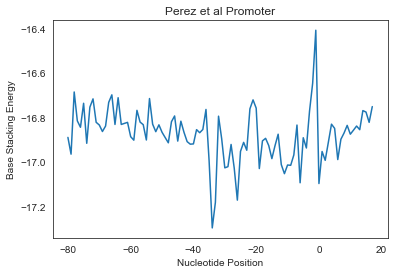

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Base Stacking Energy", title='Perez et al Promoter')

# show the plot
plt.show()